# Project Overview

## Problem Being Solved
The agricultural industry in Saskatchewan is a significant contributor to the economy, and optimizing crop production is essential for sustaining growth and profitability. This project aims to address these challenges by utilizing rural manucipality crop yeilds and Geographic Information System (GIS) datas, and machine learning techniques to identify the optimal rural municipality in Saskatchewan for flax investment and to propose suitable crop rotation plans.

## Objective of the Project
The primary objective of this project is to leverage GIS data and machine learning models to provide actionable insights for farmers and investors in Saskatchewan. Specifically, the project aims to:

1. **Identify the Best Rural Municipality for Flax Investment**: Using crop yeilds and GIS datas to analyze historical crop yields, the project seeks to pinpoint the rural municipality in Saskatchewan that offers the most favorable farms for flax cultivation.

2. **Determine Optimal Crop Rotation Strategies**: To ensure sustainable agricultural practices and enhance soil health, the project will explore different crop rotation options that can be integrated with flax farming.

## Questions Being Answered
To achieve the above objectives, the project will answer the following key questions:

1. **Where is the Best Rural Municipality in Saskatchewan to Invest in Flax?**

2. **What Crop Rotation Can We Consider for Flax Farming?**


## Methodology
To answer these questions, the project employs two machine learning models: unsupervised spectral clustering and K-means clustering.

1. **Unsupervised Spectral Clustering**

2. **K-means Clustering**

By combining these two clustering techniques, the project provides a comprehensive analysis of the rural municipalities in Saskatchewan, offering a clear recommendations for flax investment and sustainable crop rotation practices.


In [1]:
# Importing Libraries

import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations and matrix calculations
import geopandas as gpd  # Extends Pandas to allow spatial operations on geometric types
import seaborn as sb  # Statistical data visualization based on matplotlib
import matplotlib.pyplot as plt  # 2D plotting library for creating static, animated, and interactive visualizations
import ipywidgets as widgets  # Interactive HTML widgets for Jupyter notebooks and IPython
from IPython.display import display  # Display rich content in Jupyter notebooks
from ipywidgets import interact  # Creates interactive user interface controls in notebooks
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance
from sklearn.cluster import SpectralClustering  # Spectral clustering for partitioning data into clusters
from sklearn.cluster import KMeans  # K-Means clustering algorithm
from sklearn.metrics import silhouette_score  # Evaluates clustering performance using silhouette analysis


### Loading Crop Yields and GIS Data for Rural Municipalities


In [2]:
import os  # Import the os module for path manipulation

# Define the main directory path
main_path = '/Users/abels/Desktop/Pallet Skills/Courses/Stream 3/'

# Concatenate the main directory path with the filenames to get the full file paths
df_rm_yields_path = os.path.join(main_path, 'rm-yields-data.csv')
gdf_rm_path = os.path.join(main_path + 'RM_shapefile', 'RuralMunicipality.shp')

# # Reading 2000-2023 Aggregated Yield Data
df_rm_yields = pd.read_csv(df_rm_yields_path)
gdf_rm = gpd.read_file(gdf_rm_path)

In [3]:
df_rm_yields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25607 entries, 0 to 25606
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          25607 non-null  int64  
 1   RM            25607 non-null  int64  
 2   Winter Wheat  3104 non-null   float64
 3   Canola        14588 non-null  float64
 4   Spring Wheat  25498 non-null  float64
 5   Mustard       4680 non-null   float64
 6   Durum         11926 non-null  float64
 7   Sunflowers    946 non-null    float64
 8   Oats          24348 non-null  float64
 9   Lentils       5907 non-null   float64
 10  Peas          8703 non-null   float64
 11  Barley        25272 non-null  float64
 12  Fall Rye      15914 non-null  float64
 13  Canary Seed   3941 non-null   float64
 14  Spring Rye    805 non-null    float64
 15  Tame Hay      4205 non-null   float64
 16  Flax          21310 non-null  float64
 17  Chickpeas     1296 non-null   float64
dtypes: float64(16), int64(2)
m

In [4]:
df_rm_yields.head()

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.0,NaN,NaN,NaN,16.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN
2,1940,1,NaN,NaN,12.0,NaN,NaN,NaN,23.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,8.0,NaN
3,1941,1,NaN,NaN,18.0,NaN,NaN,NaN,32.0,NaN,NaN,28.0,NaN,NaN,NaN,NaN,5.0,NaN
4,1942,1,NaN,NaN,20.0,NaN,NaN,NaN,35.0,NaN,NaN,28.0,14.0,NaN,NaN,NaN,5.0,NaN


In [5]:
df_rm_yields.columns

Index(['Year', 'RM', 'Winter Wheat', 'Canola', 'Spring Wheat', 'Mustard',
       'Durum', 'Sunflowers', 'Oats', 'Lentils', 'Peas', 'Barley', 'Fall Rye',
       'Canary Seed', 'Spring Rye', 'Tame Hay', 'Flax', 'Chickpeas'],
      dtype='object')

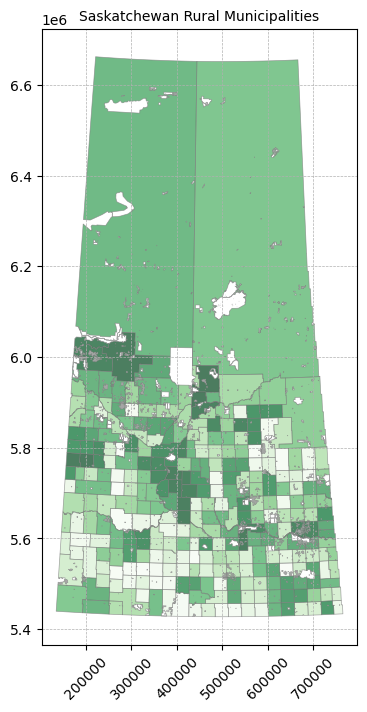

In [6]:
# Plot the GeoDataFrame with customizations
fig, ax = plt.subplots(figsize=(10, 8))

gdf_rm.plot(ax=ax, 
         cmap='Greens',  # Use a color map (e.g., 'viridis')
         legend=False,     # Show legend
         legend_kwds={'label': "Legend Title", 'orientation': "horizontal"},  # Legend settings
         linewidth=0.5,    # Adjust line width
         edgecolor='gray', # Adjust edge color
         alpha=0.7        # Adjust transparency
        )

# Add title
plt.title('Saskatchewan Rural Municipalities', fontsize=10)
plt.xticks(rotation=45)
# Add scale bar
#scalebar = gpd.plotting.add_scalebar(ax, location='lower right', length=100, linewidth=2, color='black', units='km')

# Add gridlines
ax.grid(True, linestyle='--', linewidth=0.5)

# Add labels to axes
#ax.set_xlabel('Longitude', fontsize=12)
#ax.set_ylabel('Latitude', fontsize=12)

# Add annotations
ax.annotate('Annotation Text', xy=(0.6, 0.6), xytext=(0.6, 0.6),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()

In [7]:
df_major_crops=df_rm_yields[['Year', 'RM', 'Canola', 'Spring Wheat',
       'Durum','Oats', 'Lentils', 'Peas', 'Barley', 'Flax']]
# Changing Pounds to bushels
df_major_crops.loc[:, 'Lentils'] = df_major_crops['Lentils'] / 60
df_major_crops.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,25607.0,1980.379310,24.799668,1938.000000,1959.0,1980.0,2002.00,2023.00
RM,25607.0,248.919280,148.815798,1.000000,124.0,247.0,370.00,622.00
Canola,14588.0,24.564054,9.603160,0.000000,18.0,23.1,30.00,60.10
Spring Wheat,25498.0,26.196668,11.631959,0.000000,19.0,26.0,32.00,198.00
Durum,11926.0,29.200370,10.113954,0.000000,23.0,28.3,34.50,88.10
Oats,24348.0,47.675041,22.555618,0.000000,33.0,46.2,60.00,165.10
Lentils,5907.0,19.649733,6.956639,0.766667,15.0,19.5,24.10,56.85
Peas,8703.0,31.240917,10.474982,0.000000,24.3,31.2,38.30,86.80
Barley,25272.0,38.470558,17.057229,0.000000,26.4,38.0,49.10,105.94
Flax,21310.0,14.431579,7.199819,0.000000,9.0,14.0,19.49,110.00


In [8]:
gdf_rm.head()

,PPID,EFFDT,EXPDT,FEATURECD,RMNO,RMNM,SHAPE_AREA,SHAPE_LEN,geometry
0,0101000095,2019-01-21,None,RMPPID,095,GOLDEN WEST,8.101431e+08,265851.388799,"POLYGON ((654081.000 5546088.320, 654885.320 5..."
1,0101000378,2019-07-29,None,RMPPID,378,ROSEMOUNT,5.844701e+08,161271.937167,"POLYGON ((265258.740 5810148.180, 266062.740 5..."
2,0101000288,2015-01-27,None,RMPPID,288,PLEASANT VALLEY,8.532007e+08,116895.097209,"POLYGON ((254141.490 5701256.420, 254179.510 5..."
3,0101000106,2019-04-24,None,RMPPID,106,WHISKA CREEK,8.526283e+08,129288.281136,"POLYGON ((339874.810 5539057.770, 339849.430 5..."
4,0101000132,2019-07-16,None,RMPPID,132,HILLSBOROUGH,6.343913e+08,103052.690196,"POLYGON ((445175.620 5573313.600, 445572.880 5..."


In [9]:
gdf_rm_clean= gdf_rm[['RMNO', 'RMNM', 'geometry']]
gdf_rm_clean.head()

,RMNO,RMNM,geometry
0,095,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5..."
1,378,ROSEMOUNT,"POLYGON ((265258.740 5810148.180, 266062.740 5..."
2,288,PLEASANT VALLEY,"POLYGON ((254141.490 5701256.420, 254179.510 5..."
3,106,WHISKA CREEK,"POLYGON ((339874.810 5539057.770, 339849.430 5..."
4,132,HILLSBOROUGH,"POLYGON ((445175.620 5573313.600, 445572.880 5..."


In [10]:
print(gdf_rm_clean.info())
print("%" * 40)
print(df_major_crops.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   RMNO      298 non-null    object  
 1   RMNM      298 non-null    object  
 2   geometry  298 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 7.1+ KB
None
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25607 entries, 0 to 25606
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          25607 non-null  int64  
 1   RM            25607 non-null  int64  
 2   Canola        14588 non-null  float64
 3   Spring Wheat  25498 non-null  float64
 4   Durum         11926 non-null  float64
 5   Oats          24348 non-null  float64
 6   Lentils       5907 non-null   float64
 7   Peas          8703 non-null   float64
 8   Barley        25272 non-null  float64
 9   Fl

In [11]:
# Type changing
gdf_rm_clean.loc[:, 'RMNO'] = gdf_rm_clean['RMNO'].astype(int)

# Merging Yield data with GIS
gdf_rm_yield= pd.merge(gdf_rm_clean.rename(columns={'RMNO':'RM'}), df_major_crops, on='RM', how='inner')
gdf_rm_yield

,RM,RMNM,geometry,Year,Canola,Spring Wheat,Durum,Oats,Lentils,Peas,Barley,Flax
0,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1938,NaN,4.0,NaN,1.0,NaN,NaN,1.0,0.0
1,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1939,NaN,4.0,NaN,1.0,NaN,NaN,1.0,1.0
2,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1940,NaN,4.0,NaN,9.0,NaN,NaN,7.0,2.0
3,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1941,NaN,17.0,NaN,29.0,NaN,NaN,23.0,8.0
4,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1942,NaN,23.0,NaN,48.0,NaN,NaN,32.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25416,491,BUCKLAND,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2019,50.5,56.5,NaN,103.6,NaN,45.1,82.1,NaN
25417,491,BUCKLAND,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2020,44.8,54.6,NaN,100.6,NaN,42.2,79.1,35.0
25418,491,BUCKLAND,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2021,31.5,43.0,NaN,73.2,NaN,26.6,64.6,20.0
25419,491,BUCKLAND,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2022,47.7,63.1,NaN,106.2,NaN,37.7,77.0,NaN


## Exploratory Data Analysis

In [12]:
import ipywidgets as widgets
import matplotlib.pyplot as plt

# List of crops to include in plots
crops = ['Flax', 'Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley', ]

# Function to plot yield data for a specific crop and year range
def plot_yield_by_year(crop, year_range):
    # Filter the years based on the selected range
    years = list(range(year_range[0], year_range[1] + 1))
    
    # Calculate the number of rows and columns needed for the subplots
    num_plots = len(years)
    rows = (num_plots // 3) + (1 if num_plots % 3 else 0)
    cols = min(num_plots, 3)
    
    # Set up the figure with the appropriate number of rows and columns
    fig, axs = plt.subplots(rows, cols, figsize=(20, rows * 5))
    fig.suptitle(f'{crop} Yield per Year ({years[0]} - {years[-1]})', color='black', size=20)
    
    # Flatten the axs array for easy indexing
    axs = axs.flatten()

    # Loop through each year and plot it on its respective subplot
    for i, year in enumerate(years):
        ax = axs[i]
        gdf_rm_yield[gdf_rm_yield['Year'] == year].plot(
            column=crop,
            cmap='Purples',
            legend=True,
            ax=ax,
            edgecolor='black'
        )
        ax.set_title(f'Year: {year}', color='black', size=20)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Remove unused subplots if there are any
    for j in range(len(years), len(axs)):
        fig.delaxes(axs[j])
    
    # Adjust the spacing between subplots for readability
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Create a dropdown widget for selecting crops
crop_slider = widgets.Dropdown(
    options=crops,
    value= 'Flax', # Default to selecting 'Falx' -- value= for selecting all crops ,
    description='Select Crop:',
    disabled=False,
)

# Create a range slider widget for selecting years
year_slider = widgets.IntRangeSlider(
    value=[2015, 2023],
    min=2000,
    max=2023,
    step=1,
    description='Select Years:',
    continuous_update=False,
)

# Function to update the plot based on the selected crop and year range
def update_plot(crop, year_range):
    plot_yield_by_year(crop, year_range)

# Display the sliders and link them to the update function
widgets.interact(update_plot, crop=crop_slider, year_range=year_slider)


interactive(children=(Dropdown(description='Select Crop:', options=('Flax', 'Canola', 'Spring Wheat', 'Durum',…

<function __main__.update_plot(crop, year_range)>

<Axes: >

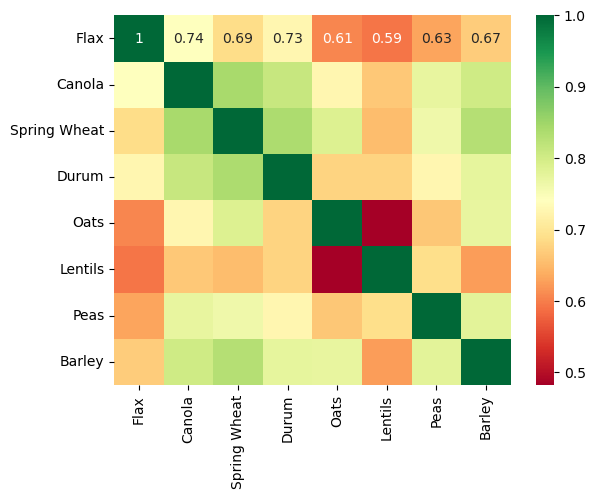

In [13]:
# crops - is a list defined in mapping cell
# >0.2 slight correlation
# >0.4 Moderate corrleation
# > 0.6 High
# > 0.8 Very correlation 

# Pearson Correlation
sb.heatmap(df_major_crops.loc[df_major_crops['Year']>2000][crops].corr(),
           annot=True,
           cmap='RdYlGn')

# Rank correlatation

In [14]:
# Function to plot the data for a given crop
gdf_rm_yield=pd.merge(gdf_rm_clean.rename(columns={'RMNO':'RM'}), df_major_crops, on='RM', how='inner')


def plot_data(selected_crop):
    gdf_rm_yield.plot(selected_crop, cmap='Purples', legend=True)
    plt.title(f'Historical Average | {selected_crop}')
    plt.show()

# Create the crop selection widget
crop_selection = widgets.Dropdown(
    options=crops,
    value= 'Flax',  # Default to 'Flax'
    description='Crop',
    disabled=False
)

# Use interact to create the interactive plot
interact(plot_data, selected_crop=crop_selection)


interactive(children=(Dropdown(description='Crop', options=('Flax', 'Canola', 'Spring Wheat', 'Durum', 'Oats',…

<function __main__.plot_data(selected_crop)>

## Outliers
### Before treating

In [15]:
from ipywidgets import interact

filtered_df = df_major_crops[(df_major_crops['Year'] >= 2000) & (df_major_crops['Year'] <= 2023)]

# Function to plot the boxplots for a given year range
def plot_boxplots(year_range, selected_crops):
    # Set up the figure and axes
    fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 16))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Create a list of years for the range
    years = list(range(year_range[0], year_range[1] + 1))  # Display years within the selected range
    
    # Check if the selected crops exist in the DataFrame
    existing_crops = [crop for crop in selected_crops if crop in filtered_df.columns]
    
    # Iterate through the years and create a boxplot for each crop
    for i, year in enumerate(years):
        if i < len(axes):
            ax = axes[i]
            year_data = filtered_df[filtered_df['Year'] == year]
            year_data.boxplot(column=existing_crops, ax=ax)
            ax.set_title(f'Year: {year}', size=12, color='teal')
            ax.tick_params(axis='x', rotation=30)  # Rotate x-tick labels
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Create the year range slider
year_range_slider = widgets.IntRangeSlider(
    value=[2000, 2024], 
    min=2000, 
    max=2023, 
    step=1, 
    description='Year Range'
)

# Create the crop selection widget
crop_selection = widgets.SelectMultiple(
    options=crops,
    value= crops,  # Default to selecting all crops
    description='Crops',
    disabled=False
)

# Use interact to create the interactive plot
interact(plot_boxplots, year_range=year_range_slider, selected_crops=crop_selection)


interactive(children=(IntRangeSlider(value=(2000, 2023), description='Year Range', max=2023, min=2000), Select…

<function __main__.plot_boxplots(year_range, selected_crops)>

## After treating

In [16]:
# Calculate mean and standard deviation for each crop
means = df_major_crops[crops].mean()
stds = df_major_crops[crops].std()

# Determine the clipping bounds
lower_bounds = means - 3 * stds
upper_bounds = means + 3 * stds

# Clip the data
df_clipped = df_major_crops.copy()
for crop in crops:
    df_clipped[crop] = df_major_crops[crop].clip(lower=lower_bounds[crop], upper=upper_bounds[crop])

# Function to plot the boxplots for a given year range
def plot_boxplots(year_range, selected_crops):
    fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 16))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Create a list of years for the range
    years = list(range(year_range[0], year_range[1] + 1))  # Display years within the selected range

    # Check if the selected crops exist in the DataFrame
    existing_crops = [crop for crop in selected_crops if crop in df_clipped.columns]

    # Iterate through the years and create a boxplot for each crop
    for i, year in enumerate(years):
        if i < len(axes):
            ax = axes[i]
            year_data = df_clipped[df_clipped['Year'] == year]
            year_data.boxplot(column=existing_crops, ax=ax)
            ax.set_title(f'Year: {year}', size=12, color='teal')
            ax.tick_params(axis='x', rotation=30)  # Rotate x-tick labels

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Create the year range slider
year_range_slider = widgets.IntRangeSlider(
    value=[2000, 2024], 
    min=2000, 
    max=2023, 
    step=1, 
    description='Year Range'
)

# Create the crop selection widget
crop_selection = widgets.SelectMultiple(
    options=crops,
    value= crops,  # Default to selecting all crops
    description='Crops',
    disabled=False
)

# Use interact to create the interactive plot
interact(plot_boxplots, year_range=year_range_slider, selected_crops=crop_selection)


interactive(children=(IntRangeSlider(value=(2000, 2023), description='Year Range', max=2023, min=2000), Select…

<function __main__.plot_boxplots(year_range, selected_crops)>

## Feature Construction and Selection


In [17]:
#Filtering df by year
df_00_23 = df_major_crops[df_major_crops['Year']>=2000]

# Feature Construction
df_00_23.drop(columns='Year').groupby('RM').mean()


,Canola,Spring Wheat,Durum,Oats,Lentils,Peas,Barley,Flax
RM,,,,,,,,
1,28.314583,38.569130,29.716000,68.702917,11.716667,34.991667,57.301739,19.885238
2,29.668750,38.728261,36.761250,65.697917,18.819643,34.091667,52.302083,20.976364
3,27.938750,37.818750,38.888750,61.715417,15.459217,31.004167,57.693333,19.897083
4,26.847917,34.304583,34.329583,53.237619,21.702795,29.908696,45.924583,19.531250
5,26.401667,31.305000,34.202083,51.038462,19.988108,31.752381,54.778571,18.697500
...,...,...,...,...,...,...,...,...
520,31.642917,41.914167,NaN,89.890952,11.116667,33.743478,58.897083,18.500000
555,34.171765,45.965385,NaN,74.849412,NaN,NaN,47.779000,NaN
561,33.493636,44.946087,NaN,77.994500,21.083333,33.790476,56.213043,NaN


In [18]:
# Merging gdf_rm_clean and  df_00_23.groupby('RM').mean()

merged_df = pd.merge(gdf_rm_clean.rename(columns={'RMNO': 'RM'}), df_00_23.groupby('RM').mean(), on='RM')
merged_df

,RM,RMNM,geometry,Year,Canola,Spring Wheat,Durum,Oats,Lentils,Peas,Barley,Flax
0,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",2011.500000,30.753750,39.475000,40.265417,63.784583,23.757978,34.795833,56.937500,21.882917
1,378,ROSEMOUNT,"POLYGON ((265258.740 5810148.180, 266062.740 5...",2011.500000,28.086250,34.090000,27.058571,57.819545,24.336227,33.062500,47.125417,20.509000
2,288,PLEASANT VALLEY,"POLYGON ((254141.490 5701256.420, 254179.510 5...",2011.500000,24.806250,30.102500,31.482500,48.397391,18.210431,29.275000,47.137917,17.456364
3,106,WHISKA CREEK,"POLYGON ((339874.810 5539057.770, 339849.430 5...",2011.500000,23.513478,27.858750,29.297083,51.646667,17.549660,24.929167,42.387083,18.475789
4,132,HILLSBOROUGH,"POLYGON ((445175.620 5573313.600, 445572.880 5...",2011.608696,27.562143,26.274545,31.049500,49.943529,19.661620,25.960000,42.132105,20.834444
...,...,...,...,...,...,...,...,...,...,...,...,...
290,588,MEADOW LAKE,"MULTIPOLYGON (((307104.520 6003527.820, 307139...",2011.500000,31.999583,44.596250,31.250000,78.482917,20.659524,37.920833,64.087083,20.928571
291,352,HEART'S HILL,"POLYGON ((187054.680 5758478.840, 187005.860 5...",2011.500000,28.322917,34.064583,33.946667,52.728261,23.767611,31.800000,48.530000,20.476250
292,351,PROGRESS,"POLYGON ((209380.850 5785495.100, 209851.950 5...",2011.500000,29.635000,36.546667,35.760000,72.161000,20.699938,32.258333,52.682500,23.663043
293,520,PADDOCKWOOD,"MULTIPOLYGON (((451283.150 5981138.420, 451285...",2011.500000,31.642917,41.914167,NaN,89.890952,11.116667,33.743478,58.897083,18.500000


In [19]:
# Group by 'RM' and calculate mean and standard deviation for each crop
df_agg_00_23 = df_00_23.groupby('RM')[crops].agg(['mean', 'std'])

# Flatten the column multi-index
df_agg_00_23.columns = ['_'.join(col).strip() for col in df_agg_00_23.columns.values]

# Reset index to make 'RM' a column again
df_agg_00_23.reset_index(inplace=True)

In [20]:
df_agg_00_23

,RM,Flax_mean,Flax_std,Canola_mean,Canola_std,Spring Wheat_mean,Spring Wheat_std,Durum_mean,Durum_std,Oats_mean,Oats_std,Lentils_mean,Lentils_std,Peas_mean,Peas_std,Barley_mean,Barley_std
0,1,19.885238,6.034225,28.314583,7.251919,38.569130,9.937700,29.716000,5.769946,68.702917,21.210231,11.716667,0.589256,34.991667,9.203351,57.301739,18.607237
1,2,20.976364,4.478501,29.668750,5.456009,38.728261,8.209199,36.761250,12.107829,65.697917,15.301719,18.819643,9.439195,34.091667,9.293425,52.302083,9.806744
2,3,19.897083,5.137400,27.938750,6.955191,37.818750,8.898998,38.888750,8.297462,61.715417,9.990864,15.459217,7.746315,31.004167,7.430518,57.693333,10.757646
3,4,19.531250,4.321678,26.847917,6.624128,34.304583,8.999300,34.329583,10.130348,53.237619,17.791265,21.702795,7.636129,29.908696,6.344497,45.924583,10.585443
4,5,18.697500,5.087583,26.401667,7.654146,31.305000,7.488937,34.202083,9.808930,51.038462,15.160395,19.988108,5.764766,31.752381,6.896783,54.778571,15.952418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,520,18.500000,NaN,31.642917,11.245617,41.914167,12.705160,NaN,NaN,89.890952,27.648040,11.116667,NaN,33.743478,13.712331,58.897083,16.703247
292,555,NaN,NaN,34.171765,12.309706,45.965385,21.635478,NaN,NaN,74.849412,25.576126,NaN,NaN,NaN,NaN,47.779000,23.750120
293,561,NaN,NaN,33.493636,10.563191,44.946087,14.381770,NaN,NaN,77.994500,19.927426,21.083333,17.206265,33.790476,13.260049,56.213043,18.604493
294,588,20.928571,6.648487,31.999583,9.736271,44.596250,12.508024,31.250000,14.361407,78.482917,20.325299,20.659524,7.235739,37.920833,9.633997,64.087083,14.686782


In [ ]:
#saving df to a csv file
df_agg_00_23.to_csv('/Users/abels/Desktop/Pallet Skills/Courses/Stream 3/Final Project/rm_yield_00_23-crops.csv')

## Methodology
The project employs two machine learning models: unsupervised spectral clustering and K-means clustering.
- **Spectral Clustering** is better for capturing complex, non-convex cluster shapes and handling overlapping clusters but is computationally expensive and requires a similarity matrix.
- **K-Means Clustering** is simple, efficient, and scalable but assumes spherical clusters of similar size and struggles with non-convex clusters and varying densities.

# Optimal Spectral Clustering Results

In [21]:
# Function to prepare data for each crop
def prepare_data_for_crop(df, crop):
    columns = [f'{crop}_mean', f'{crop}_std']
    crop_data = df[columns].dropna().values
    return crop_data

# Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Function to perform spectral clustering and choose the optimal number of clusters
def spectral_clustering(data, n_clusters):
    clustering = SpectralClustering(n_clusters=n_clusters, assign_labels="discretize", random_state=0)
    labels = clustering.fit_predict(data)
    return labels

# Function to find the optimal number of clusters
def find_optimal_clusters(data, max_k):
    scores = []
    for k in range(2, max_k+1):
        labels = spectral_clustering(data, k)
        score = silhouette_score(data, labels)
        scores.append(score)
    optimal_k = scores.index(max(scores)) + 2
    return optimal_k, scores

# Function to perform clustering for selected crops
def perform_clustering(selected_crops):
    for crop in selected_crops:
        print(f"Clustering for {crop}")
        cluster_crop(crop)

# Helper function to perform clustering and visualization for a single crop
def cluster_crop(crop):
    # Prepare the data for the crop
    crop_data = prepare_data_for_crop(df_agg_00_23, crop)
    
    # Standardize the data
    crop_data_scaled = standardize_data(crop_data)
    
    # Find the optimal number of clusters
    optimal_k, scores = find_optimal_clusters(crop_data_scaled, 10)
    
    # Perform spectral clustering with the optimal number of clusters
    labels = spectral_clustering(crop_data_scaled, optimal_k)
    
    # Add the cluster labels to the original dataframe
    df_agg_00_23[f'{crop}_Spectral_Cluster_Optimal'] = np.nan
    df_agg_00_23.loc[~df_agg_00_23[[f'{crop}_mean', f'{crop}_std']].isna().any(axis=1), f'{crop}_Spectral_Cluster_Optimal'] = labels
    
    # Visualize the silhouette scores
    plt.figure()
    plt.plot(range(2, 11), scores, marker='o')
    plt.title(f'Silhouette Scores for {crop}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    # Print the results
    print(f'Optimal number of clusters for {crop}: {optimal_k}')
    print(f'Silhouette scores for {crop}: {scores}')
    
    # Visualize the clustering results
    plt.figure()
    plt.scatter(df_agg_00_23[f'{crop}_mean'], df_agg_00_23[f'{crop}_std'], c=df_agg_00_23[f'{crop}_Spectral_Cluster_Optimal'], cmap='viridis')
    plt.title(f'Optimal Spectral Clustering Results for {crop}')
    plt.xlabel(f'{crop}_mean')
    plt.ylabel(f'{crop}_std')
    plt.colorbar(label='Cluster')
    plt.show()

# Create the crop selection widget
crop_selection = widgets.SelectMultiple(
    options=crops,
    value=crops,  # Default to selecting all crops
    description='Crops',
    disabled=False
)

# Use interact to create the interactive plot
interact(perform_clustering, selected_crops=crop_selection)


interactive(children=(SelectMultiple(description='Crops', index=(0, 1, 2, 3, 4, 5, 6, 7), options=('Flax', 'Ca…

<function __main__.perform_clustering(selected_crops)>

# Custom Spectral Clustering Results

In [22]:
# crops = ['Flax', 'Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Function to prepare data for each crop
def prepare_data_for_crop(df, crop):
    columns = [f'{crop}_mean', f'{crop}_std']
    crop_data = df[columns].dropna().values
    indices = df[columns].dropna().index
    return crop_data, indices

# Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Function to perform spectral clustering
def perform_spectral_clustering(data, n_clusters):
    clustering = SpectralClustering(n_clusters=n_clusters, assign_labels="discretize", random_state=0)
    labels = clustering.fit_predict(data)
    return labels

# Function to perform clustering for selected crops
def perform_clustering(selected_crops, n_clusters):
    for crop in selected_crops:
        print(f"Clustering for {crop}")
        cluster_crop(crop, n_clusters)

# Helper function to perform clustering and visualization for a single crop
def cluster_crop(crop, n_clusters):
    # Prepare the data for the crop
    crop_data, indices = prepare_data_for_crop(df_agg_00_23, crop)
    
    # Standardize the data
    crop_data_scaled = standardize_data(crop_data)
    
    # Perform spectral clustering with the selected number of clusters
    labels = perform_spectral_clustering(crop_data_scaled, n_clusters)
    
    # Add the cluster labels to the original dataframe
    df_agg_00_23[f'{crop}_Spectral_Cluster_Custom'] = np.nan
    df_agg_00_23.loc[indices, f'{crop}_Spectral_Cluster_Custom'] = labels
    
    # Visualize the clustering results
    plt.figure()
    plt.scatter(df_agg_00_23[f'{crop}_mean'], df_agg_00_23[f'{crop}_std'], c=df_agg_00_23[f'{crop}_Spectral_Cluster_Custom'], cmap='viridis')
    plt.title(f'Spectral Clustering Results for {crop}')
    plt.xlabel(f'{crop}_mean')
    plt.ylabel(f'{crop}_std')
    plt.colorbar(label='Cluster')
    plt.show()

# Create the crop selection widget
crop_selection = widgets.SelectMultiple(
    options=crops,
    value=crops,  # Default to selecting all crops
    description='Crops',
    disabled=False
)

# Create the number of clusters slider
n_clusters_slider = widgets.IntSlider(
    value=5, 
    min=2, 
    max=10, 
    step=1, 
    description='Clusters'
)

# Use interact to create the interactive plot
interact(perform_clustering, selected_crops=crop_selection, n_clusters=n_clusters_slider)


interactive(children=(SelectMultiple(description='Crops', index=(0, 1, 2, 3, 4, 5, 6, 7), options=('Flax', 'Ca…

<function __main__.perform_clustering(selected_crops, n_clusters)>

# Optimal K-mean Clustering Results


In [23]:

crops = ['Flax', 'Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Function to prepare data for each crop
def prepare_data_for_crop(df, crop):
    columns = [f'{crop}_mean', f'{crop}_std']
    crop_data = df[columns].dropna().values
    indices = df[columns].dropna().index
    return crop_data, indices

# Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Function to perform KMeans clustering and get inertia
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    labels = kmeans.fit_predict(data)
    return labels, kmeans.inertia_

# Function to find the optimal number of clusters using the elbow method
def find_optimal_clusters(data, max_k):
    inertias = []
    for k in range(1, max_k+1):
        _, inertia = kmeans_clustering(data, k)
        inertias.append(inertia)
    
    # Elbow method to find the optimal k
    optimal_k = np.argmax(np.diff(inertias, 2)) + 2
    return optimal_k, inertias

# Function to perform clustering for selected crops
def perform_clustering(selected_crops):
    for crop in selected_crops:
        print(f"Clustering for {crop}")
        cluster_crop(crop)

# Helper function to perform clustering and visualization for a single crop
def cluster_crop(crop):
    # Prepare the data for the crop
    crop_data, indices = prepare_data_for_crop(df_agg_00_23, crop)
    
    # Standardize the data
    crop_data_scaled = standardize_data(crop_data)
    
    # Find the optimal number of clusters
    optimal_k, inertias = find_optimal_clusters(crop_data_scaled, 10)
    
    # Perform KMeans clustering with the optimal number of clusters
    labels, _ = kmeans_clustering(crop_data_scaled, optimal_k)
    
    # Add the cluster labels to the original dataframe
    df_agg_00_23[f'{crop}_KMeans_Cluster_Optimal'] = np.nan
    df_agg_00_23.loc[indices, f'{crop}_KMeans_Cluster_Optimal'] = labels
    
    # Visualize the inertia values
    plt.figure()
    plt.plot(range(1, 11), inertias, marker='o')
    plt.title(f'Elbow Method for {crop}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.axvline(optimal_k, color='red', linestyle='--')
    plt.show()
    
    # Print the results
    print(f'Optimal number of clusters for {crop}: {optimal_k}')
    print(f'Inertia values for {crop}: {inertias}')
    
    # Visualize the clustering results
    plt.figure()
    plt.scatter(df_agg_00_23[f'{crop}_mean'], df_agg_00_23[f'{crop}_std'], c=df_agg_00_23[f'{crop}_KMeans_Cluster_Optimal'], cmap='viridis')
    plt.title(f'Optimal KMeans Clustering Results for {crop}')
    plt.xlabel(f'{crop}_mean')
    plt.ylabel(f'{crop}_std')
    plt.colorbar(label='Cluster')
    plt.show()

# Create the crop selection widget
crop_selection = widgets.SelectMultiple(
    options=crops,
    value=crops,  # Default to selecting all crops
    description='Crops',
    disabled=False
)

# Use interact to create the interactive plot
interact(perform_clustering, selected_crops=crop_selection)


interactive(children=(SelectMultiple(description='Crops', index=(0, 1, 2, 3, 4, 5, 6, 7), options=('Flax', 'Ca…

<function __main__.perform_clustering(selected_crops)>

# Custom K-mean Clustering Results


In [24]:

# Function to prepare data for each crop
def prepare_data_for_crop(df, crop):
    columns = [f'{crop}_mean', f'{crop}_std']
    crop_data = df[columns].dropna().values
    return crop_data, df[columns].dropna().index

# Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Perform KMeans clustering with a fixed number of clusters
def perform_kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    labels = kmeans.fit_predict(data)
    return labels

# Function to perform clustering for selected crops and number of clusters
def perform_clustering(selected_crops, n_clusters):
    for crop in selected_crops:
        print(f"Clustering for {crop}")
        cluster_crop(crop, n_clusters)

# Helper function to perform clustering and visualization for a single crop
def cluster_crop(crop, n_clusters):
    # Prepare the data for the crop
    crop_data, indices = prepare_data_for_crop(df_agg_00_23, crop)
    
    # Standardize the data
    crop_data_scaled = standardize_data(crop_data)
    
    # Perform KMeans clustering with the selected number of clusters
    labels = perform_kmeans_clustering(crop_data_scaled, n_clusters)
    
    # Add the cluster labels to the original dataframe
    df_agg_00_23[f'{crop}_KMeans_Cluster_Custom'] = np.nan
    df_agg_00_23.loc[indices, f'{crop}_KMeans_Cluster_Custom'] = labels
    
    # Visualize the clustering results
    plt.figure()
    plt.scatter(df_agg_00_23[f'{crop}_mean'], df_agg_00_23[f'{crop}_std'], c=df_agg_00_23[f'{crop}_KMeans_Cluster_Custom'], cmap='viridis')
    plt.title(f'KMeans Clustering Results for {crop}')
    plt.xlabel(f'{crop}_mean')
    plt.ylabel(f'{crop}_std')
    plt.colorbar(label='Cluster')
    plt.show()

# Create the crop selection widget
crop_selection = widgets.SelectMultiple(
    options=crops,
    value=crops,  # Default to selecting all crops
    description='Crops',
    disabled=False
)

# Create the number of clusters slider
n_clusters_slider = widgets.IntSlider(
    value=5, 
    min=2, 
    max=10, 
    step=1, 
    description='Clusters'
)

# Use interact to create the interactive plot
interact(perform_clustering, selected_crops=crop_selection, n_clusters=n_clusters_slider)


interactive(children=(SelectMultiple(description='Crops', index=(0, 1, 2, 3, 4, 5, 6, 7), options=('Flax', 'Ca…

<function __main__.perform_clustering(selected_crops, n_clusters)>

## GIS Analysis to visualize areas with highest production

In [25]:
df_agg_00_23

,RM,Flax_mean,Flax_std,Canola_mean,Canola_std,Spring Wheat_mean,Spring Wheat_std,Durum_mean,Durum_std,Oats_mean,...,Peas_KMeans_Cluster_Optimal,Barley_KMeans_Cluster_Optimal,Flax_KMeans_Cluster_Custom,Canola_KMeans_Cluster_Custom,Spring Wheat_KMeans_Cluster_Custom,Durum_KMeans_Cluster_Custom,Oats_KMeans_Cluster_Custom,Lentils_KMeans_Cluster_Custom,Peas_KMeans_Cluster_Custom,Barley_KMeans_Cluster_Custom
0,1,19.885238,6.034225,28.314583,7.251919,38.569130,9.937700,29.716000,5.769946,68.702917,...,1.0,1.0,2.0,2.0,1.0,3.0,4.0,2.0,4.0,1.0
1,2,20.976364,4.478501,29.668750,5.456009,38.728261,8.209199,36.761250,12.107829,65.697917,...,1.0,0.0,2.0,2.0,1.0,2.0,4.0,0.0,4.0,2.0
2,3,19.897083,5.137400,27.938750,6.955191,37.818750,8.898998,38.888750,8.297462,61.715417,...,0.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
3,4,19.531250,4.321678,26.847917,6.624128,34.304583,8.999300,34.329583,10.130348,53.237619,...,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,2.0,3.0
4,5,18.697500,5.087583,26.401667,7.654146,31.305000,7.488937,34.202083,9.808930,51.038462,...,0.0,1.0,2.0,2.0,3.0,0.0,2.0,0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,520,18.500000,NaN,31.642917,11.245617,41.914167,12.705160,NaN,NaN,89.890952,...,1.0,1.0,NaN,4.0,4.0,NaN,1.0,NaN,3.0,4.0
292,555,NaN,NaN,34.171765,12.309706,45.965385,21.635478,NaN,NaN,74.849412,...,NaN,1.0,NaN,4.0,4.0,NaN,3.0,NaN,NaN,1.0
293,561,NaN,NaN,33.493636,10.563191,44.946087,14.381770,NaN,NaN,77.994500,...,1.0,1.0,NaN,4.0,4.0,NaN,4.0,1.0,3.0,1.0
294,588,20.928571,6.648487,31.999583,9.736271,44.596250,12.508024,31.250000,14.361407,78.482917,...,1.0,1.0,4.0,1.0,4.0,2.0,4.0,0.0,1.0,4.0


In [26]:
df_agg_00_23.columns

Index(['RM', 'Flax_mean', 'Flax_std', 'Canola_mean', 'Canola_std',
       'Spring Wheat_mean', 'Spring Wheat_std', 'Durum_mean', 'Durum_std',
       'Oats_mean', 'Oats_std', 'Lentils_mean', 'Lentils_std', 'Peas_mean',
       'Peas_std', 'Barley_mean', 'Barley_std',
       'Flax_Spectral_Cluster_Optimal', 'Canola_Spectral_Cluster_Optimal',
       'Spring Wheat_Spectral_Cluster_Optimal',
       'Durum_Spectral_Cluster_Optimal', 'Oats_Spectral_Cluster_Optimal',
       'Lentils_Spectral_Cluster_Optimal', 'Peas_Spectral_Cluster_Optimal',
       'Barley_Spectral_Cluster_Optimal', 'Flax_Spectral_Cluster_Custom',
       'Canola_Spectral_Cluster_Custom',
       'Spring Wheat_Spectral_Cluster_Custom', 'Durum_Spectral_Cluster_Custom',
       'Oats_Spectral_Cluster_Custom', 'Lentils_Spectral_Cluster_Custom',
       'Peas_Spectral_Cluster_Custom', 'Barley_Spectral_Cluster_Custom',
       'Flax_KMeans_Cluster_Optimal', 'Canola_KMeans_Cluster_Optimal',
       'Spring Wheat_KMeans_Cluster_Optimal', 'D

In [27]:

# List of crops and corresponding cluster columns
crops_clusters = {
    'Canola': ['Canola_Spectral_Cluster_Optimal', 'Canola_Spectral_Cluster_Custom', 'Canola_KMeans_Cluster_Optimal', 'Canola_KMeans_Cluster_Custom'],
    'Spring Wheat': ['Spring Wheat_Spectral_Cluster_Optimal', 'Spring Wheat_Spectral_Cluster_Custom', 'Spring Wheat_KMeans_Cluster_Optimal', 'Spring Wheat_KMeans_Cluster_Custom'],
    'Durum': ['Durum_Spectral_Cluster_Optimal', 'Durum_Spectral_Cluster_Custom', 'Durum_KMeans_Cluster_Optimal', 'Durum_KMeans_Cluster_Custom'],
    'Oats': ['Oats_Spectral_Cluster_Optimal', 'Oats_Spectral_Cluster_Custom', 'Oats_KMeans_Cluster_Optimal', 'Oats_KMeans_Cluster_Custom'],
    'Lentils': ['Lentils_Spectral_Cluster_Optimal', 'Lentils_Spectral_Cluster_Custom', 'Lentils_KMeans_Cluster_Optimal', 'Lentils_KMeans_Cluster_Custom'],
    'Peas': ['Peas_Spectral_Cluster_Optimal', 'Peas_Spectral_Cluster_Custom', 'Peas_KMeans_Cluster_Optimal', 'Peas_KMeans_Cluster_Custom'],
    'Barley': ['Barley_Spectral_Cluster_Optimal', 'Barley_Spectral_Cluster_Custom', 'Barley_KMeans_Cluster_Optimal', 'Barley_KMeans_Cluster_Custom'],
    'Flax': ['Flax_Spectral_Cluster_Optimal','Flax_Spectral_Cluster_Custom', 'Flax_KMeans_Cluster_Optimal', 'Flax_KMeans_Cluster_Custom'],
}

# Initialize a new DataFrame for ranked columns
df_agg_00_23_ranked = df_agg_00_23.copy()

# Rank the clusters based on the mean crop yield for each crop
for crop, clusters in crops_clusters.items():
    mean_column = f'{crop}_mean'
    
    for cluster_col in clusters:
        # Calculate the mean crop yield grouped by the cluster column
        cluster_means = df_agg_00_23.groupby(cluster_col).mean()[mean_column]
        
        # Rank the clusters based on the mean crop yield
        df_agg_00_23_ranked[f'{cluster_col}_ranked'] = df_agg_00_23[cluster_col].map(cluster_means.rank(method='min'))

# Drop old unranked cluster columns
for clusters in crops_clusters.values():
    df_agg_00_23_ranked.drop(columns=clusters, inplace=True)

# Function to visualize the ranking
def visualize_ranking(selected_crop):
    ranked_columns = [col for col in df_agg_00_23_ranked.columns if selected_crop in col and 'ranked' in col]
    
    for col in ranked_columns:
        plt.figure()
        plt.scatter(df_agg_00_23_ranked[f'{selected_crop}_mean'], df_agg_00_23_ranked[f'{selected_crop}_std'], c=df_agg_00_23_ranked[col], cmap='viridis')
        plt.title(f'Cluster Ranking for {selected_crop} - {col}')
        plt.xlabel(f'{selected_crop}_mean')
        plt.ylabel(f'{selected_crop}_std')
        plt.colorbar(label='Cluster Ranking')
        plt.show()

# Create the crop selection widget
crop_selection = widgets.Dropdown(
    options=crops_clusters.keys(),
    value='Flax',  # Default to 'Canola'
    description='Crop',
    disabled=False
)

# Use interact to create the interactive plot
interact(visualize_ranking, selected_crop=crop_selection)


interactive(children=(Dropdown(description='Crop', index=7, options=('Canola', 'Spring Wheat', 'Durum', 'Oats'…

<function __main__.visualize_ranking(selected_crop)>

In [28]:
# List of crops and corresponding cluster columns
crops_clusters = {
    'Canola': ['Canola_Spectral_Cluster_Optimal', 'Canola_Spectral_Cluster_Custom', 'Canola_KMeans_Cluster_Optimal', 'Canola_KMeans_Cluster_Custom'],
    'Spring Wheat': ['Spring Wheat_Spectral_Cluster_Optimal', 'Spring Wheat_Spectral_Cluster_Custom', 'Spring Wheat_KMeans_Cluster_Optimal', 'Spring Wheat_KMeans_Cluster_Custom'],
    'Durum': ['Durum_Spectral_Cluster_Optimal', 'Durum_Spectral_Cluster_Custom', 'Durum_KMeans_Cluster_Optimal', 'Durum_KMeans_Cluster_Custom'],
    'Oats': ['Oats_Spectral_Cluster_Optimal', 'Oats_Spectral_Cluster_Custom', 'Oats_KMeans_Cluster_Optimal', 'Oats_KMeans_Cluster_Custom'],
    'Lentils': ['Lentils_Spectral_Cluster_Optimal', 'Lentils_Spectral_Cluster_Custom', 'Lentils_KMeans_Cluster_Optimal', 'Lentils_KMeans_Cluster_Custom'],
    'Peas': ['Peas_Spectral_Cluster_Optimal', 'Peas_Spectral_Cluster_Custom', 'Peas_KMeans_Cluster_Optimal', 'Peas_KMeans_Cluster_Custom'],
    'Barley': ['Barley_Spectral_Cluster_Optimal', 'Barley_Spectral_Cluster_Custom', 'Barley_KMeans_Cluster_Optimal', 'Barley_KMeans_Cluster_Custom'],
    'Flax': ['Flax_Spectral_Cluster_Optimal','Flax_Spectral_Cluster_Custom', 'Flax_KMeans_Cluster_Optimal', 'Flax_KMeans_Cluster_Custom'],
}


# Initialize a new DataFrame for ranked columns
df_agg_00_23_ranked = df_agg_00_23.copy()

# Rank the clusters based on the mean crop yield for each crop
for crop, clusters in crops_clusters.items():
    mean_column = f'{crop}_mean'
    
    for cluster_col in clusters:
        # Calculate the mean crop yield grouped by the cluster column
        cluster_means = df_agg_00_23.groupby(cluster_col).mean()[mean_column]
        
        # Rank the clusters based on the mean crop yield
        df_agg_00_23_ranked[f'{cluster_col}_ranked'] = df_agg_00_23[cluster_col].map(cluster_means.rank(method='min'))

# Drop old unranked cluster columns
for clusters in crops_clusters.values():
    df_agg_00_23_ranked.drop(columns=clusters, inplace=True)

In [ ]:
df_agg_00_23_ranked

In [ ]:
gdf_rm_clean

In [ ]:
# Changing data type 
gdf_rm['RMNO']= gdf_rm['RMNO'].astype(int)
gdf_rm_clean= gdf_rm[['RMNO', 'geometry']].rename(columns={'RMNO': 'RM'})

In [ ]:
final_df = pd.merge(gdf_rm_clean, df_agg_00_23_ranked, on = 'RM')

In [ ]:
final_df

In [ ]:
final_df.columns

In [ ]:
gpd.GeoDataFrame(final_df).explore('Flax_Spectral_Cluster_Optimal_ranked', cmap ="Purples")

In [ ]:
gpd.GeoDataFrame(final_df).explore('Flax_KMeans_Cluster_Optimal_ranked', cmap ="Purples")

In [ ]:
final_df.to_file('/Users/abels/Desktop/Pallet Skills/Courses/Stream 3/Final Project/crop_clustered_ranked_00_23.geojson', driver = 'GeoJSON')

In [ ]:
final_df.to_csv('/Users/abels/Desktop/Pallet Skills/Courses/Stream 3/Final Project/crop_clustered_ranked_00_23.csv')